In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Step 2: Define function to load from a GeoTIFF file
def load_tif(image_path):
    with rasterio.open(image_path) as src:
        img = src.read(1)
        
    return img

In [14]:
def calc_savi(nir_band_path, red_band_path, year):
    # Step 4: Load SWIR and NIR bands
    nir = load_tif(nir_band_path)
    red = load_tif(red_band_path)

    # SAVI calculation parameters
    L = 0.5

    # Calculate SAVI
    savi = ((nir - red) / (nir + red + L)) * (1 + L)

    # Plot the SAVI result
    plt.figure(figsize=(8, 6))
    plt.imshow(savi, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.colorbar(label="SAVI")
    plt.title(f"Soil Adjusted Vegetation Index (SAVI) {year}")
    plt.xlabel("Pixel Column")
    plt.ylabel("Pixel Row")
    plt.show()

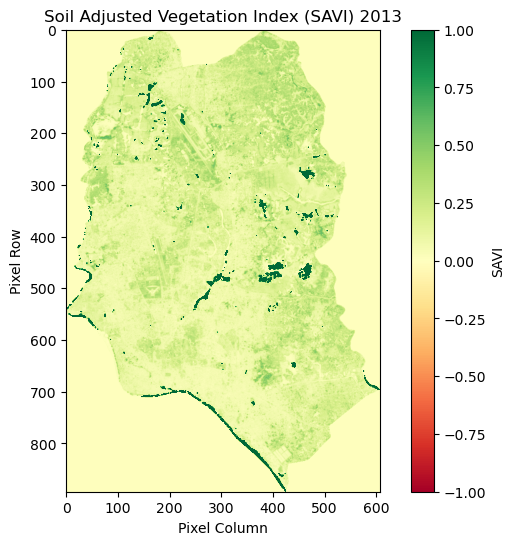

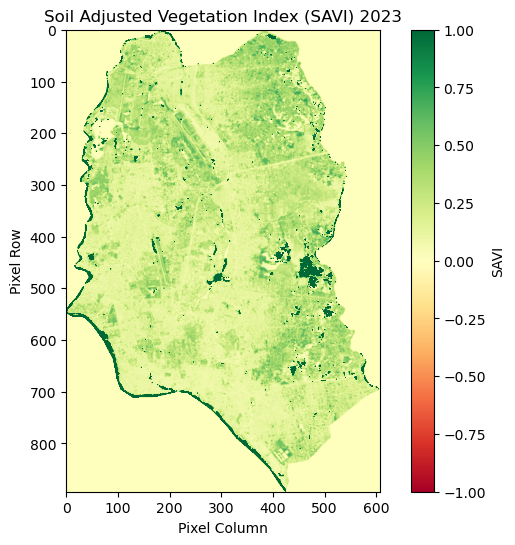

In [ ]:
ROOT = './Landsat8/cropped_bbox/'

# Set paths to RED and NIR bands
# e.g., NIR for Landsat 8 (Band 5)
nir_band_path_2013 = ROOT + '2013/LC08_L2SP_137044_20131224_20200912_02_T1_SR_B5.TIF'

# e.g., RED for Landsat 8 (Band 4)
red_band_path_path_2013 = ROOT + '2013/LC08_L2SP_137044_20131224_20200912_02_T1_SR_B4.TIF'  

calc_savi(nir_band_path_2013, red_band_path_path_2013, '2013')

nir_band_path_2023 = ROOT + '2023/LC08_L2SP_137044_20231102_20231109_02_T1_SR_B5.TIF'
red_band_path_2023 = ROOT + '2023/LC08_L2SP_137044_20231102_20231109_02_T1_SR_B4.TIF'  

calc_savi(nir_band_path_2023, red_band_path_2023, '2023')

